In [275]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.segmentation import slic
from skimage import segmentation

# Segmentación por agrupación

## Cargue la imagen de trabajo y visualícela.

In [276]:
baboon = cv2.imread("images/BABOON.png", cv2.IMREAD_GRAYSCALE)

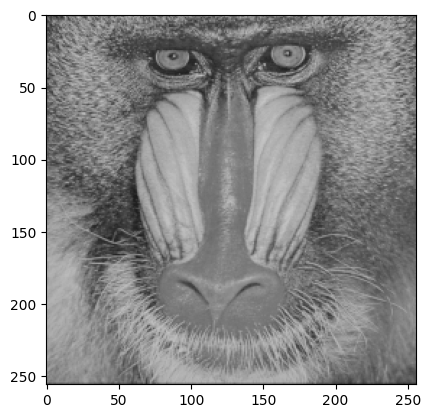

In [277]:
plt.imshow(baboon, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

## Aplique el algoritmo de K-means para segmentar por agrupación. Utilice un valor de K=3. Visualice los resultados.

In [278]:
baboon.shape

(256, 256)

In [279]:
def calc_kmeans(k):
    N = 256
    M = 256
    baboon_flat = baboon.reshape(N*M,1)
    baboon_model_kmeans = KMeans(n_clusters=k, random_state= 0).fit(baboon_flat)
    baboon_segmented_image = baboon_model_kmeans.predict(baboon_flat).reshape(N,M,1)
    return baboon_segmented_image, baboon_model_kmeans.inertia_


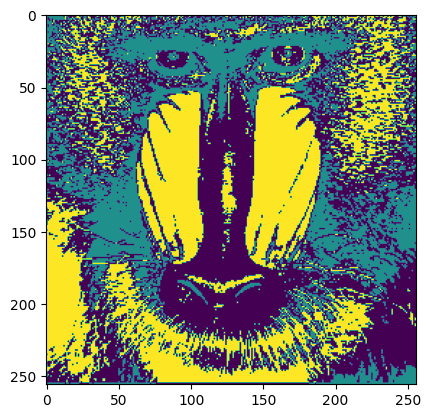

In [280]:
plt.imshow(calc_kmeans(3)[0])
plt.show()

## Utilice el método del codo para encontrar el valor óptimo de grupos en la imagen. Visualice los resultados ¿Cómo cambia la segmentación?

In [281]:
max_ = 10
n_clusters = list(range(1, max_))
inertias = []

for i in range(1, max_):
    inertias.append(calc_kmeans(i)[1])

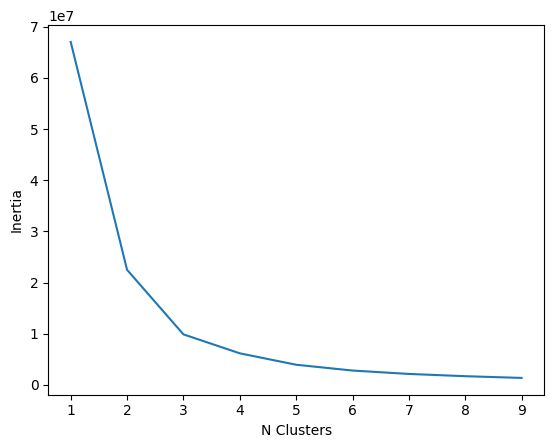

In [282]:
plt.plot(n_clusters, inertias)
plt.xlabel("N Clusters")
plt.ylabel("Inertia")

plt.show()

Como se puede observar la segmentación cambia dependiendo de la cantidad de clusteres, el codo se forma cuando K = 3. Por lo que este punto sería el ideal para la imagen del babuino.

## Aplique el algoritmo de súperpixeles SLIC. Utilice un valor de K=25. Visualice los resultados. ¿Cuántos súperpixeles se encontraron?

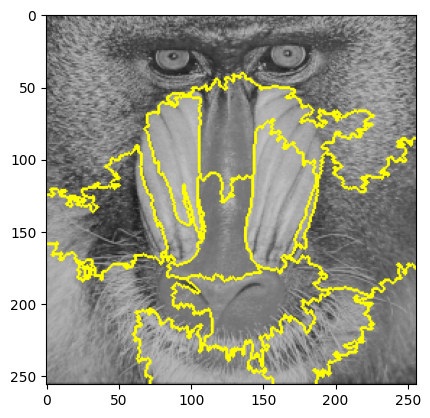

In [283]:
segments = slic(cv2.merge([baboon, baboon, baboon]), n_segments=25)
plt.imshow(segmentation.mark_boundaries(baboon, segments))
plt.show()

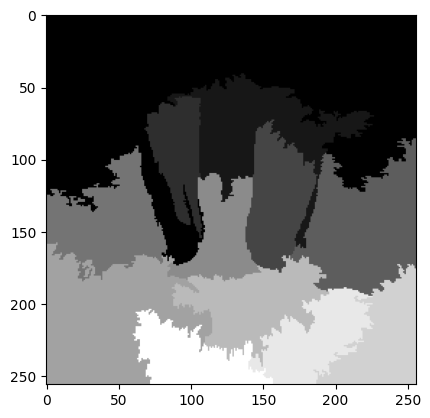

In [284]:
plt.imshow(segments, cmap= 'gray')
plt.show()

In [285]:
segments.shape

(256, 256)

In [286]:
colors_ = set()
for i in range(len(segments)):
    for j in range(len(segments[i])):
        colors_.add(segments[i][j])

In [287]:
"Cantidad de superpixeles", len(colors_)

('Cantidad de superpixeles', 12)

## Aplique el algoritmo de súperpixeles usando el valor óptimo de grupos calculado en el paso 4. Utilice dicho multiplicado por 4 y por 10. Visualice los resultados ¿Qué puede observar? ¿Qué diferencias hay entre las imágenes generadas? 

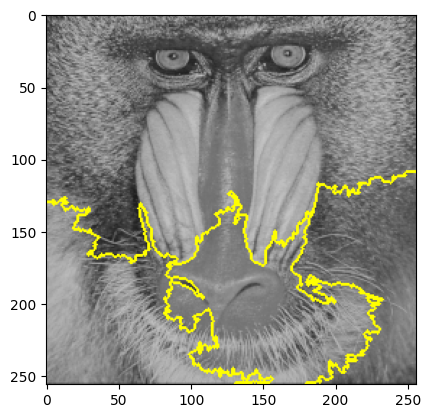

In [288]:
segments = slic(cv2.merge([baboon, baboon, baboon]), n_segments=3 * 4)
plt.imshow(segmentation.mark_boundaries(baboon, segments))
plt.show()

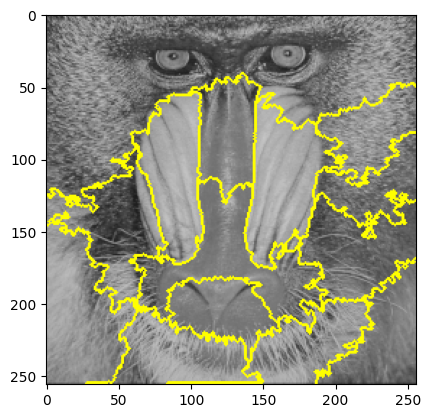

In [289]:
segments = slic(cv2.merge([baboon, baboon, baboon]), n_segments=3* 10)
plt.imshow(segmentation.mark_boundaries(baboon, segments))
plt.show()

Como se puede observar, mientras mayor sea el numero de segmentos se observa que hay una mayor cantidad de zonas identificadas. Sin embargo, el numero de segmentos con corresponde con el numero de zonas. La que multiplica por 10 tiene una mayor cantidad de detalle con respecto a la cara del babuino, ya que es capz de identificar su nariz y zonas del rostro. Mientras que el que multiplica por 3 toma zonas irregulares que a simple vista no constituyen zonas del rostro del babuino.